<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы всегда получались одни и те же результаты

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
df_train.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [7]:
df_test.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


И тренировочном и в тестовом датасете есть пропуски в колонках mileage, engine, max_power, torque, seats

In [8]:
df_train.duplicated().sum()

985

In [9]:
df_test.duplicated().sum()

62

In [10]:
# !pip install ydata_profiling


In [11]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_train, title="Cars Report")
# profile.to_widgets()

In [12]:
# profile = ProfileReport(df_test, title="Cars Report")
# profile.to_widgets()

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [13]:
for col in df_train.columns:
    try:
        median_value = df_train[col].median()
    except:
        median_value = df_train.mode()[col][0]
    df_train[col].fillna(median_value, inplace=True)
    df_train[col] = df_train[col].replace(np.nan, median_value)

    df_test[col].fillna(median_value, inplace=True)
    df_test[col] = df_test[col].replace(np.nan, median_value)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [14]:
df_train_without_price = df_train.drop(['selling_price'], axis = 1)
df_train_without_price.duplicated(keep=False).sum()

1799

In [15]:
df_train_without_price[df_train_without_price.duplicated(keep=False)]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [16]:
col_duplicates = df_train.columns.difference(['selling_price'])
df_train = df_train.drop_duplicates(subset=col_duplicates, keep='first')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [17]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [18]:
def get_float(x):
    try:
        return float(x.split(" ")[0])
    except:
        return 0
df_train['mileage'] = df_train['mileage'].apply(lambda a: get_float(a))
df_train['engine'] = df_train['engine'].apply(lambda a: get_float(a))
df_train['max_power'] = df_train['max_power'].apply(lambda a: get_float(a))
df_train = df_train.drop(['torque'], axis = 1)

df_test['mileage'] = df_test['mileage'].apply(lambda a: get_float(a))
df_test['engine'] = df_test['engine'].apply(lambda a: get_float(a))
df_test['max_power'] = df_test['max_power'].apply(lambda a: get_float(a))
df_test = df_test.drop(['torque'], axis = 1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [19]:

df_train['engine'] = df_train['engine'].apply(lambda a: int(a))
df_train['seats'] = df_train['seats'].apply(lambda a: int(a))
df_test['engine'] = df_test['engine'].apply(lambda a: int(a))
df_test['seats'] = df_test['seats'].apply(lambda a: int(a))


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [20]:
df_train.describe(include = ['int', 'float'])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.415872,1429.448973,87.646056,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.987056,485.662834,31.737685,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.100000,1248.000000,81.800000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [21]:
df_train.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [22]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

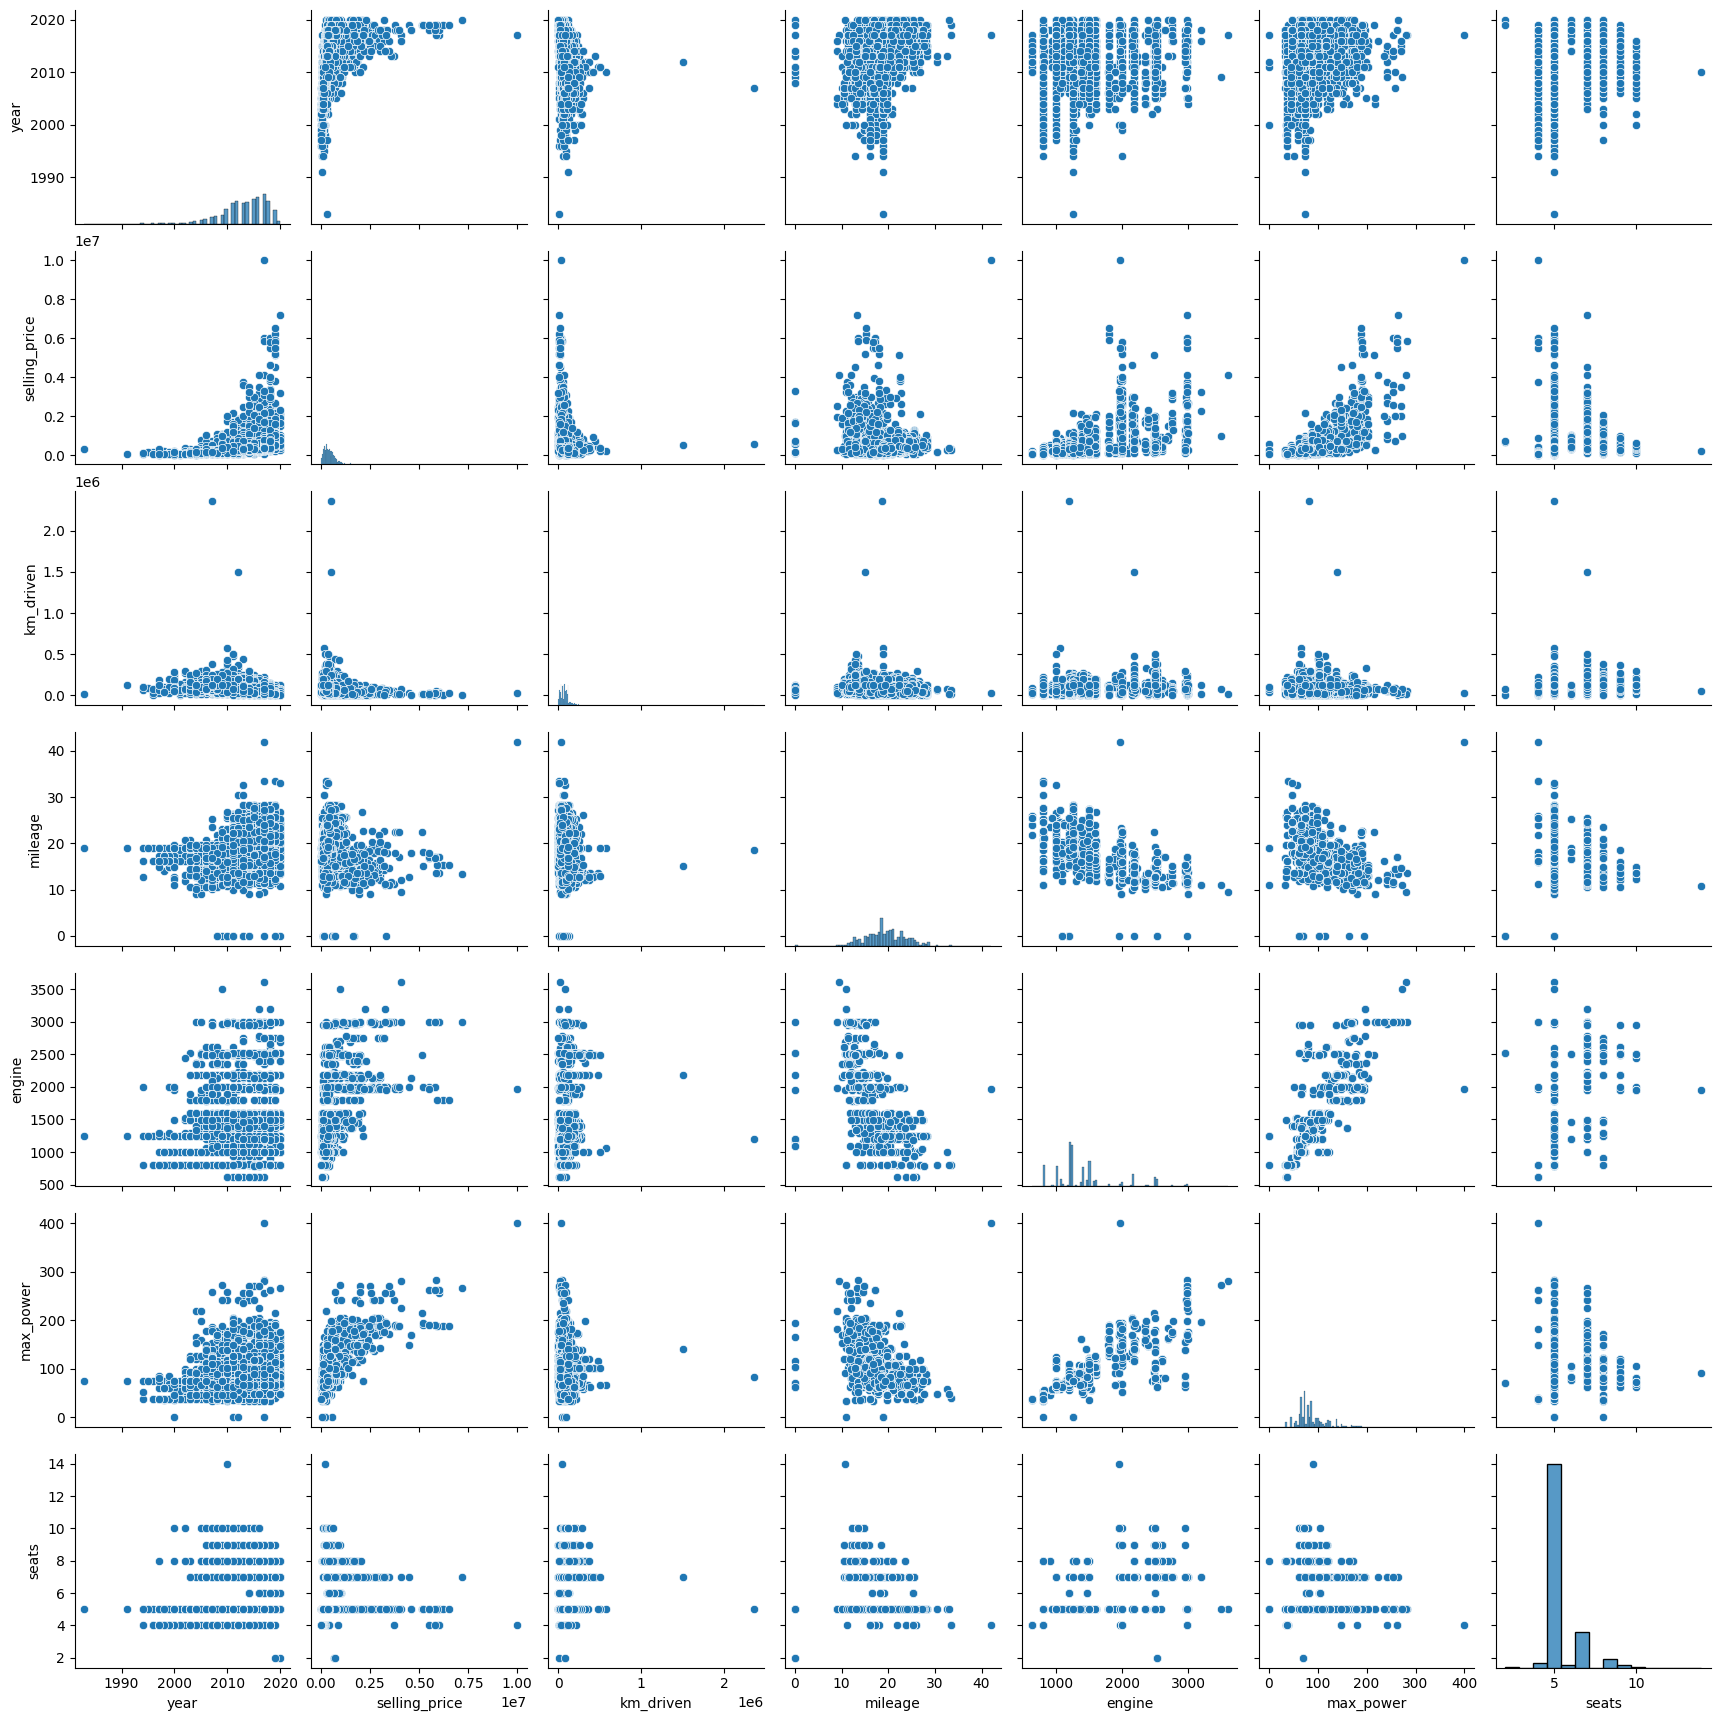

In [23]:
import seaborn

seaborn.pairplot(df_train.select_dtypes(include=['int', 'float']))
plt.show()

Высокую корреляцию c selling_price имеют столбцы year, km_driven, engine, max_power

Можно выдвинуть гипотезу, что признаки engine и max_power имеют сильную взаимную корреляцию

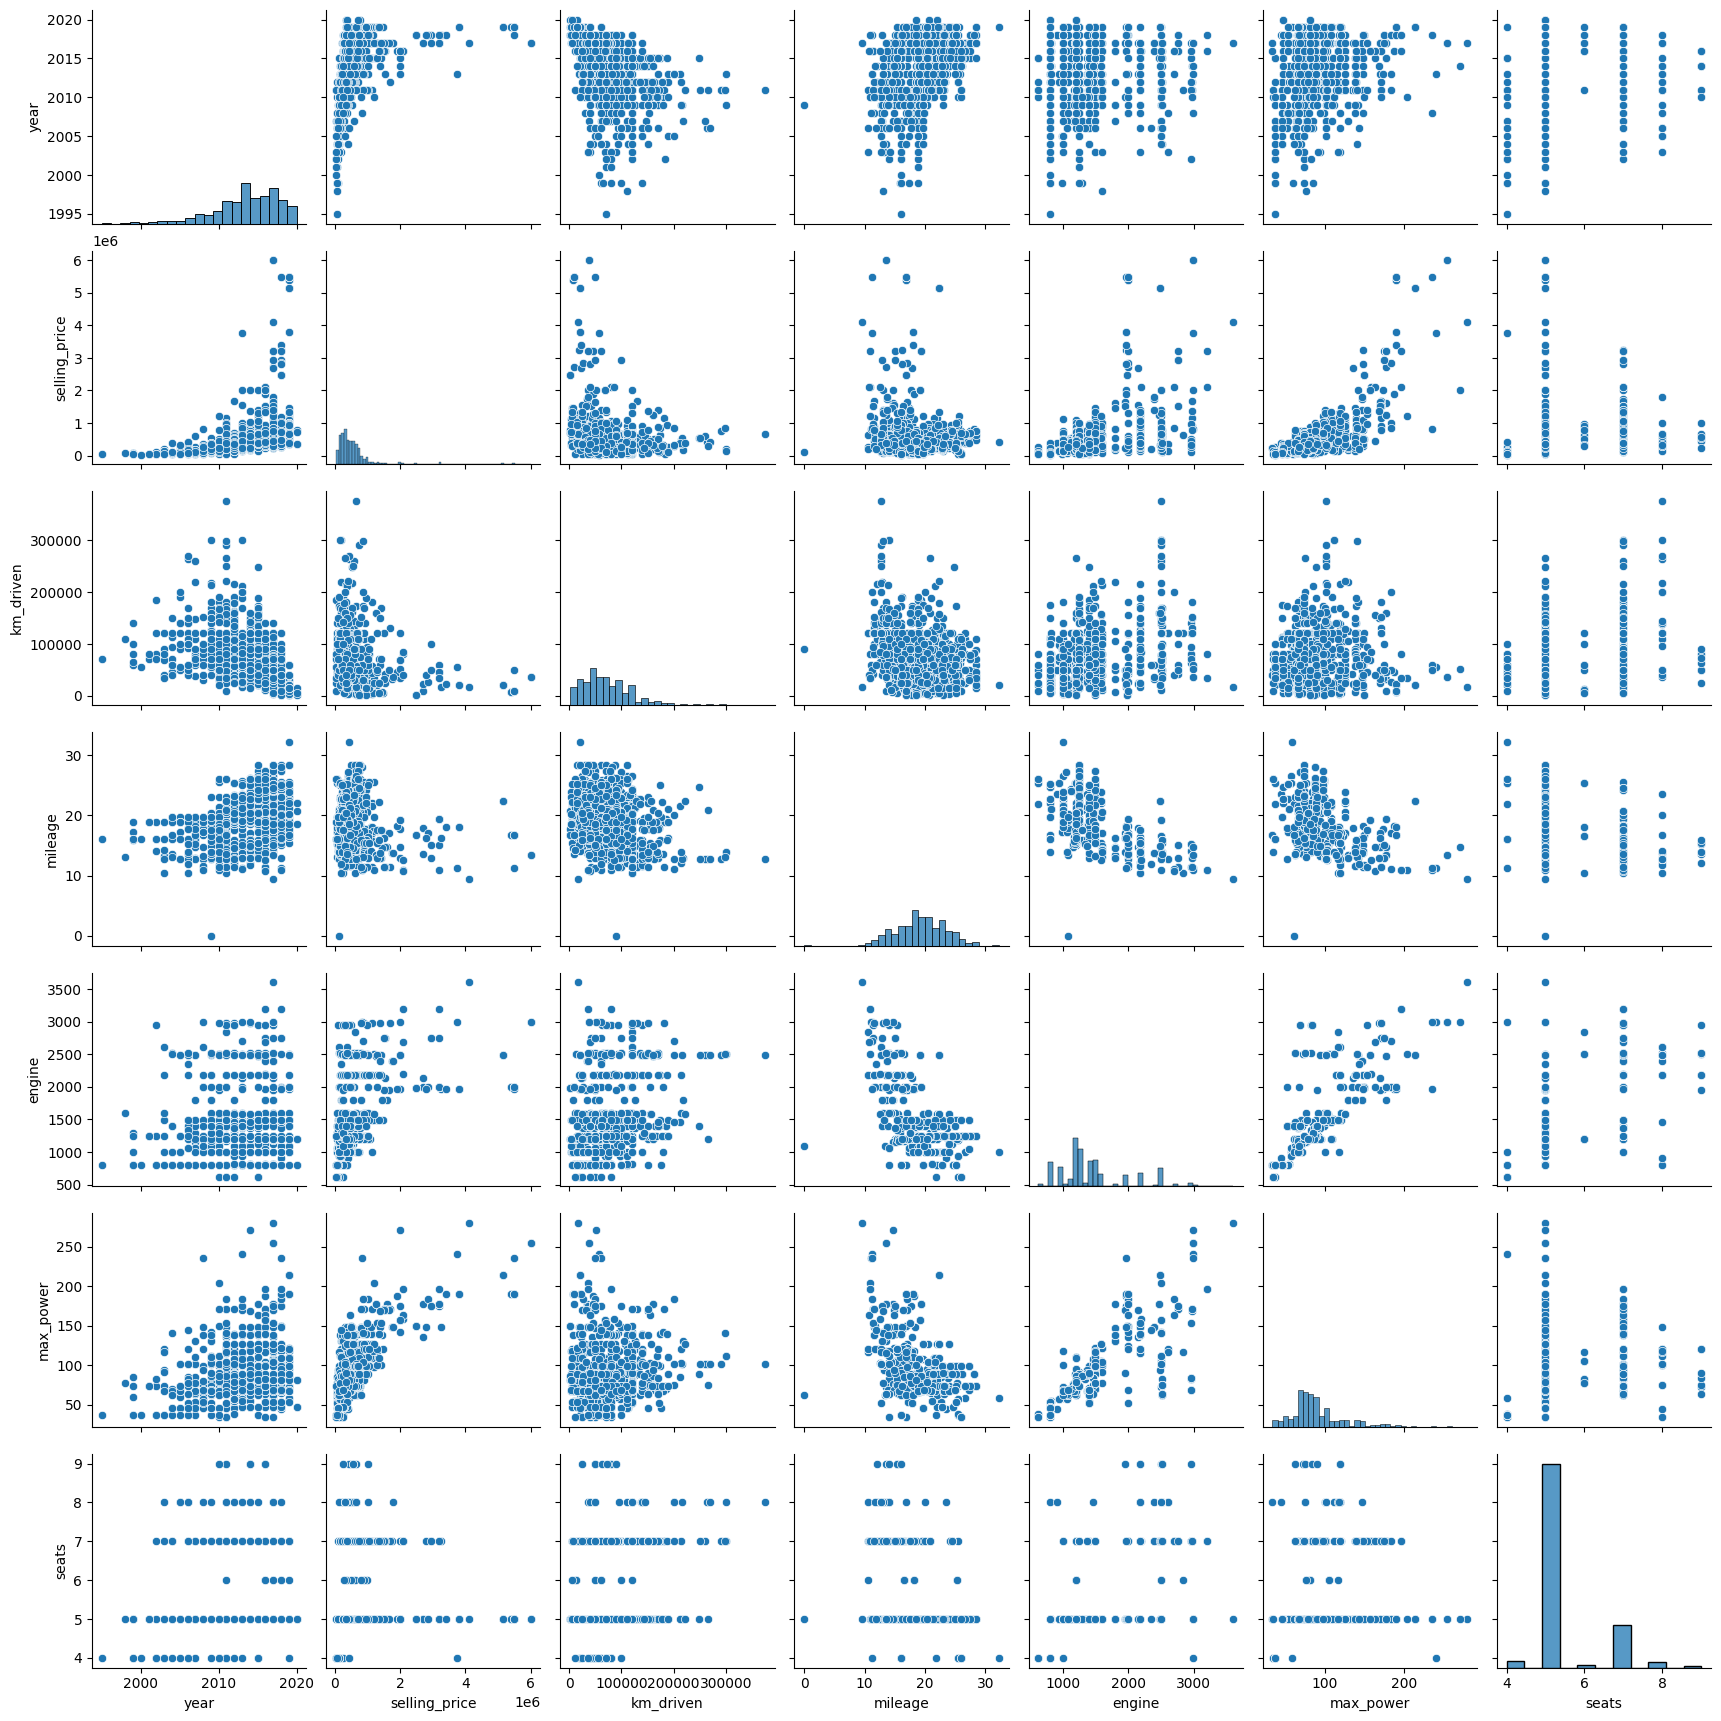

In [24]:
seaborn.pairplot(df_test.select_dtypes(include=['int', 'float']))
plt.show()

Да, данные в train и в test похожи

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


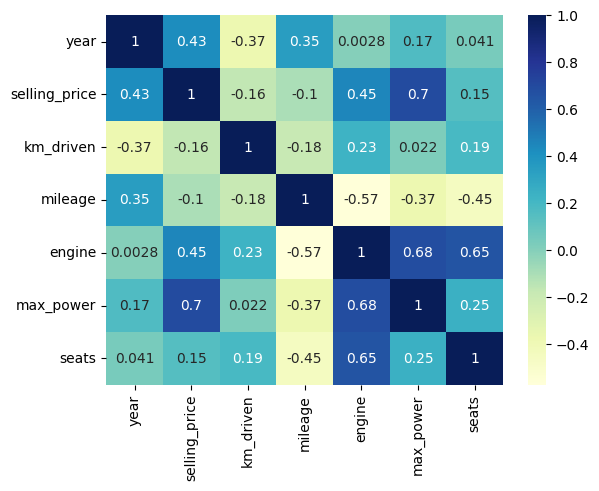

In [25]:
dataplot = seaborn.heatmap(df_train.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Какие 2 признака наименее скоррелированы между собой?
 - year и engine


Между какими наблюдается довольно сильная положительная линейная зависимость?
 - selling_price и max_power
 - engine и max_power
 - engine и seats


Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
- корреляция = -0,37. Тенденция верная, но -0,37 слишком много, чтобы быть уверенным в этом на 100%

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [26]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [27]:
y_train = df_train['selling_price']
X_train = df_train.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1)

In [28]:
assert X_train.shape == (5840, 6)


In [29]:
y_test = df_test['selling_price']
X_test = df_test.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1)

In [30]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
pred_test_v1 = model.predict(X_test)
pred_train_v1 = model.predict(X_train)


print(f"Train R2    {r2_score(y_train, pred_train_v1)}")
print(f"Train MSE   {MSE(y_train, pred_train_v1)}")
print(f"Train RMSE  {MSE(y_train, pred_train_v1)**0.5}")
print(f"Test R2     {r2_score(y_test, pred_test_v1)}")
print(f"Test MSE    {MSE(y_test, pred_test_v1)}")
print(f"Test RMSE   {MSE(y_test, pred_test_v1)**0.5}")

Train R2    0.5904143585127564
Train MSE   117402947691.15257
Train RMSE  342641.13543349196
Test R2     0.5930229417217296
Test MSE    233942034588.08112
Test RMSE   483675.54681633547


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
pred_test = model.predict(X_test_scaled)
pred_train = model.predict(X_train_scaled)


print(f"Train R2    {r2_score(y_train, pred_train)}")
print(f"Train MSE   {MSE(y_train, pred_train)}")
print(f"Train RMSE  {MSE(y_train, pred_train)**0.5}")
print(f"Test R2     {r2_score(y_test, pred_test)}")
print(f"Test MSE    {MSE(y_test, pred_test)}")
print(f"Test RMSE   {MSE(y_test, pred_test)**0.5}")

Train R2    0.590414358512756
Train MSE   117402947691.15265
Train RMSE  342641.1354334921
Test R2     0.5930229417217399
Test MSE    233942034588.07526
Test RMSE   483675.5468163294


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [33]:
model.coef_

array([147991.27493866, -44938.32969163,  29160.58466569,  60668.16173628,
       323188.46246547, -23000.22148835])

In [34]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

max_power - наиболее важный признак

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
pred_test_lasso_v1 = lasso.predict(X_test_scaled)
pred_train_lasso_v1 = lasso.predict(X_train_scaled)

print(f"Train R2    {r2_score(y_train, pred_train_lasso_v1)}")
print(f"Train MSE   {MSE(y_train, pred_train_lasso_v1)}")
print(f"Train RMSE  {MSE(y_train, pred_train_lasso_v1)**0.5}")
print(f"Test R2     {r2_score(y_test, pred_test_lasso_v1)}")
print(f"Test MSE    {MSE(y_test, pred_test_lasso_v1)}")
print(f"Test RMSE   {MSE(y_test, pred_test_lasso_v1)**0.5}")

Train R2    0.5904143584772645
Train MSE   117402947701.3259
Train RMSE  342641.1354483374
Test R2     0.5930217701389484
Test MSE    233942708047.31906
Test RMSE   483676.24300488346


In [36]:
lasso.coef_

array([147991.08675367, -44937.19711602,  29158.70424664,  60663.28480905,
       323189.3880735 , -22997.3231599 ])

Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.
- Нет, не занулила, поскольку у нас не так много столбцов на вход и они все важные. Коэффициенты довольно большие для зануления

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [37]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {'alpha': np.logspace(-4, 2, 50)}

lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=KFold(n_splits=10), scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_
coef = best_model.coef_

num_models = len(param_grid['alpha']) * 10

print(f"Сколько моделей обучил грид-сёрч: {num_models}")
print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")
print(f"Количество зануленных весов: {np.sum(coef == 0)}")


Сколько моделей обучил грид-сёрч: 500
Лучший коэффициент регуляризации (alpha): 100.0
Количество зануленных весов: 0


In [38]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [39]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-4, 2, 50),
    'l1_ratio': np.linspace(0.1, 1, 10)
}

elastic_net = ElasticNet(max_iter=10000)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=KFold(n_splits=10), scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
coef = best_model.coef_

num_models = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10

print(f"Сколько моделей обучил грид-сёрч: {num_models}")
print(f"Лучшие параметры: {best_params}")
print(f"Количество зануленных весов: {np.sum(coef == 0)}")

Сколько моделей обучил грид-сёрч: 5000
Лучшие параметры: {'alpha': 0.15264179671752334, 'l1_ratio': 0.9}
Количество зануленных весов: 0


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [40]:
df_train_only_name_and_selling_price = pd.concat([df_train['name'].apply(lambda f: f.count(" ") + 1), df_train['selling_price']], axis = 1)
df_train_only_name_and_selling_price.corr()


,name,selling_price
name,1.000000,0.199222
selling_price,0.199222,1.000000


Корреляция количества слов в name и selling_price = 0.199222, что больше по модулю, чем у некоторых фичей в train. Преобразуем name в количество слов у name

In [41]:
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()
df_train_cat['name'] = df_train['name'].apply(lambda f: f.count(" ") + 1)
df_test_cat['name'] = df_test['name'].apply(lambda f: f.count(" ") + 1)
df_train_cat

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,4,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,5,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,4,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,6,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,4,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
6993,8,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
6994,3,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
6995,4,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [42]:
# assert X_train_cat.shape == (5840, 10)

In [43]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [44]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

df_train_ohe = df_train_cat.copy()
df_test_ohe = df_test_cat.copy()
cat_poles = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
for cat in cat_poles:
    cat_ohe = pd.get_dummies(df_train_ohe[cat], prefix=cat, drop_first = True)
    df_train_ohe = df_train_ohe.drop([cat], axis = 1)
    df_train_ohe = pd.concat([df_train_ohe, cat_ohe], axis = 1)

    cat_ohe = pd.get_dummies(df_test_ohe[cat], prefix=cat, drop_first = True)
    df_test_ohe = df_test_ohe.drop([cat], axis = 1)
    df_test_ohe = pd.concat([df_test_ohe, cat_ohe], axis = 1)
all_columns = sorted(set(df_train_ohe.columns).union(set(df_test_ohe.columns)))
for col in all_columns:
    if col not in df_train_ohe.columns:
        df_train_ohe[col] = False
    if col not in df_test_ohe.columns:
        df_test_ohe[col] = False
df_train_ohe = df_train_ohe[all_columns]
df_test_ohe = df_test_ohe[all_columns]
df_train_ohe.columns

Index(['engine', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'km_driven',
       'max_power', 'mileage', 'name', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_10', 'seats_14', 'seats_4', 'seats_5', 'seats_6', 'seats_7',
       'seats_8', 'seats_9', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'selling_price', 'transmission_Manual',
       'year'],
      dtype='object')

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [45]:
df_train_ohe

,engine,fuel_Diesel,fuel_LPG,fuel_Petrol,km_driven,max_power,mileage,name,owner_Fourth & Above Owner,owner_Second Owner,...,seats_5,seats_6,seats_7,seats_8,seats_9,seller_type_Individual,seller_type_Trustmark Dealer,selling_price,transmission_Manual,year
0,1248,True,False,False,145500,74.00,23.40,4,False,False,...,True,False,False,False,False,True,False,450000,True,2014
1,1498,True,False,False,120000,103.52,21.14,5,False,True,...,True,False,False,False,False,True,False,370000,True,2014
2,1396,True,False,False,127000,90.00,23.00,4,False,False,...,True,False,False,False,False,True,False,225000,True,2010
3,1298,False,False,True,120000,88.20,16.10,4,False,False,...,True,False,False,False,False,True,False,130000,True,2007
4,1197,False,False,True,45000,81.86,20.14,6,False,False,...,True,False,False,False,False,True,False,440000,True,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,1086,False,False,True,191000,62.10,17.92,4,False,False,...,True,False,False,False,False,True,False,120000,True,2008
6993,998,False,False,True,50000,67.10,18.90,8,False,True,...,True,False,False,False,False,True,False,260000,True,2013
6994,1197,False,False,True,110000,82.85,18.50,3,False,False,...,True,False,False,False,False,True,False,320000,True,2013
6995,1493,True,False,False,119000,110.00,16.80,4,True,False,...,True,False,False,False,False,True,False,135000,True,2007


In [46]:
df_test_ohe

,engine,fuel_Diesel,fuel_LPG,fuel_Petrol,km_driven,max_power,mileage,name,owner_Fourth & Above Owner,owner_Second Owner,...,seats_5,seats_6,seats_7,seats_8,seats_9,seller_type_Individual,seller_type_Trustmark Dealer,selling_price,transmission_Manual,year
0,2498,True,False,False,168000,112.00,14.00,5,False,False,...,False,False,True,False,False,True,False,229999,True,2010
1,1497,True,False,False,25000,108.50,21.50,5,False,False,...,True,False,False,False,False,True,False,665000,True,2017
2,1799,False,False,True,218463,130.00,12.90,5,False,False,...,True,False,False,False,False,True,False,175000,False,2007
3,1498,True,False,False,173000,98.60,25.10,5,False,False,...,True,False,False,False,False,True,False,635000,True,2015
4,1172,False,False,True,70000,65.00,16.50,7,False,True,...,True,False,False,False,False,True,False,130000,True,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1086,False,False,True,100000,68.05,19.81,4,False,True,...,True,False,False,False,False,True,False,250000,True,2008
996,1197,False,False,True,50000,81.83,18.60,5,False,True,...,True,False,False,False,False,True,False,440000,True,2017
997,1396,True,False,False,40000,90.00,23.00,4,False,False,...,True,False,False,False,False,True,False,340000,True,2009
998,1197,False,False,True,25000,78.90,20.36,3,False,False,...,True,False,False,False,False,True,False,350000,True,2012


In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

df_train_ohe_new = df_train_ohe.drop(['selling_price'], axis = 1)
df_test_ohe_new = df_test_ohe.drop(['selling_price'], axis = 1)

scaler = StandardScaler().fit(df_train_ohe_new)
X_ohe_train_scaled = scaler.transform(df_train_ohe_new)
X_ohe_test_scaled = scaler.transform(df_test_ohe_new)

model = LinearRegression()
model.fit(X_ohe_train_scaled, y_train)
pred_test = model.predict(X_ohe_test_scaled)
pred_train = model.predict(X_ohe_train_scaled)

param_grid = {'alpha': np.logspace(-4, 2, 50)}

ridge = Ridge(max_iter=10000)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=KFold(n_splits=10), scoring='r2', n_jobs=-1)

grid_search.fit(X_ohe_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_train_pred_v2 = best_model.predict(X_ohe_train_scaled)
y_test_pred_v2 = best_model.predict(X_ohe_test_scaled)

train_r2 = r2_score(y_train, y_train_pred_v2)
test_r2 = r2_score(y_test, y_test_pred_v2)

print(f"Лучший alpha: {best_params['alpha']}")
print(f"R^2 на тренировочных данных: {train_r2:.4f}")
print(f"R^2 на тестовых данных: {test_r2:.4f}")
X_ohe_train_scaled

Лучший alpha: 100.0
R^2 на тренировочных данных: 0.6651
R^2 на тестовых данных: 0.6177


array([[-0.37364298,  0.91553927, -0.07652458, ..., -0.06556848,
         0.3073317 ,  0.13956959],
       [ 0.14116151,  0.91553927, -0.07652458, ..., -0.06556848,
         0.3073317 ,  0.13956959],
       [-0.06887872,  0.91553927, -0.07652458, ..., -0.06556848,
         0.3073317 , -0.83716668],
       ...,
       [-0.4786631 , -1.09225244, -0.07652458, ..., -0.06556848,
         0.3073317 , -0.10461448],
       [ 0.13086542,  0.91553927, -0.07652458, ..., -0.06556848,
         0.3073317 , -1.56971888],
       [-0.37364298,  0.91553927, -0.07652458, ..., -0.06556848,
         0.3073317 , -1.08135075]])

Да, качество улучшилось

Ранее R2 было равно 0.59. Теперь на тестовых данных 0.617, а на тренировочных 0.665

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [48]:
def business_metric(y_true, y_pred):
    abs_deviations = np.abs(y_true - y_pred)
    within_10_percent = abs_deviations <= (0.1 * y_true)
    return np.sum(within_10_percent) / len(y_true)

print("Модель только на вещественных категориях")
print(f"Тренировочная выборка: {business_metric(y_train, pred_train_v1)}")
print(f"Тестовая выборка: {business_metric(y_test, pred_test_v1)}\n")
print("Lasso регрессия с нормализованными признаками")
print(f"Тренировочная выборка: {business_metric(y_train, pred_train_lasso_v1)}")
print(f"Тестовая выборка: {business_metric(y_test, pred_test_lasso_v1)}\n")
print("Гребневая (ridge) регрессия с помощью класса GridSearchCV на основе всех признаков")
print(f"Тренировочная выборка: {business_metric(y_train, y_train_pred_v2)}")
print(f"Тестовая выборка: {business_metric(y_test, y_test_pred_v2)}\n")

Модель только на вещественных категориях
Тренировочная выборка: 0.21523972602739727
Тестовая выборка: 0.222

Lasso регрессия с нормализованными признаками
Тренировочная выборка: 0.21523972602739727
Тестовая выборка: 0.222

Гребневая (ridge) регрессия с помощью класса GridSearchCV на основе всех признаков
Тренировочная выборка: 0.2191780821917808
Тестовая выборка: 0.244



Лучше всего себя показывает гребневая регрессия

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [49]:
!pip install FastAPI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00


In [54]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
import os
import pandas as pd


app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


def clean_data(X, y):
    data = X.copy()
    data['selling_price'] = y
    for col in data.columns:
        try:
            median_value = data[col].median()
        except:
            median_value = data.mode()[col][0]
        data[col].fillna(median_value, inplace=True)
        data[col] = data[col].replace(np.nan, median_value)
        col_duplicates = data.columns.difference(['selling_price'])
        data = data.drop_duplicates(subset=col_duplicates, keep='first')
    def get_float(x):
        try:
            return float(x.split(" ")[0])
        except:
            return 0
    data['mileage'] = data['mileage'].apply(lambda a: get_float(a))
    data['engine'] = data['engine'].apply(lambda a: get_float(a))
    data['max_power'] = data['max_power'].apply(lambda a: get_float(a))
    data = data.drop(['torque'], axis = 1)
    data['engine'] = data['engine'].apply(lambda a: int(a))
    data['seats'] = data['seats'].apply(lambda a: int(a))

    data = data.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis = 1)
    return [data.drop('selling_price', axis = 1), data['selling_price']]


# df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
# df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    if not os.path.exists('car_price_model.pkl'):
        return 0
    with open('car_price_model.pkl', 'rb') as file:
        model = pickle.load(file)
    df = pd.DataFrame([item.dict()])
    X, y = clean_data(df.drop('selling_price', axis = 1), df['selling_price'])
    return model.predict(X)[0]


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    if not os.path.exists('car_price_model.pkl'):
        return 0
    result = []
    for item in items:
        pred = predict_item(item)
        result.append(pred)
    return result

@app.post("/fit_model")
def fit_model(csv_file_path: str):
    if not os.path.exists(csv_file_path):
        return {"error": "File not found"}
    df = pd.read_csv(csv_file_path)
    X = df.drop('selling_price',axis = 1)
    y = df['selling_price']
    X, y = clean_data(X, y)
    model = LinearRegression()
    model.fit(X, y)
    with open('car_price_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    return {"message": "Модель прошла тренировку"}

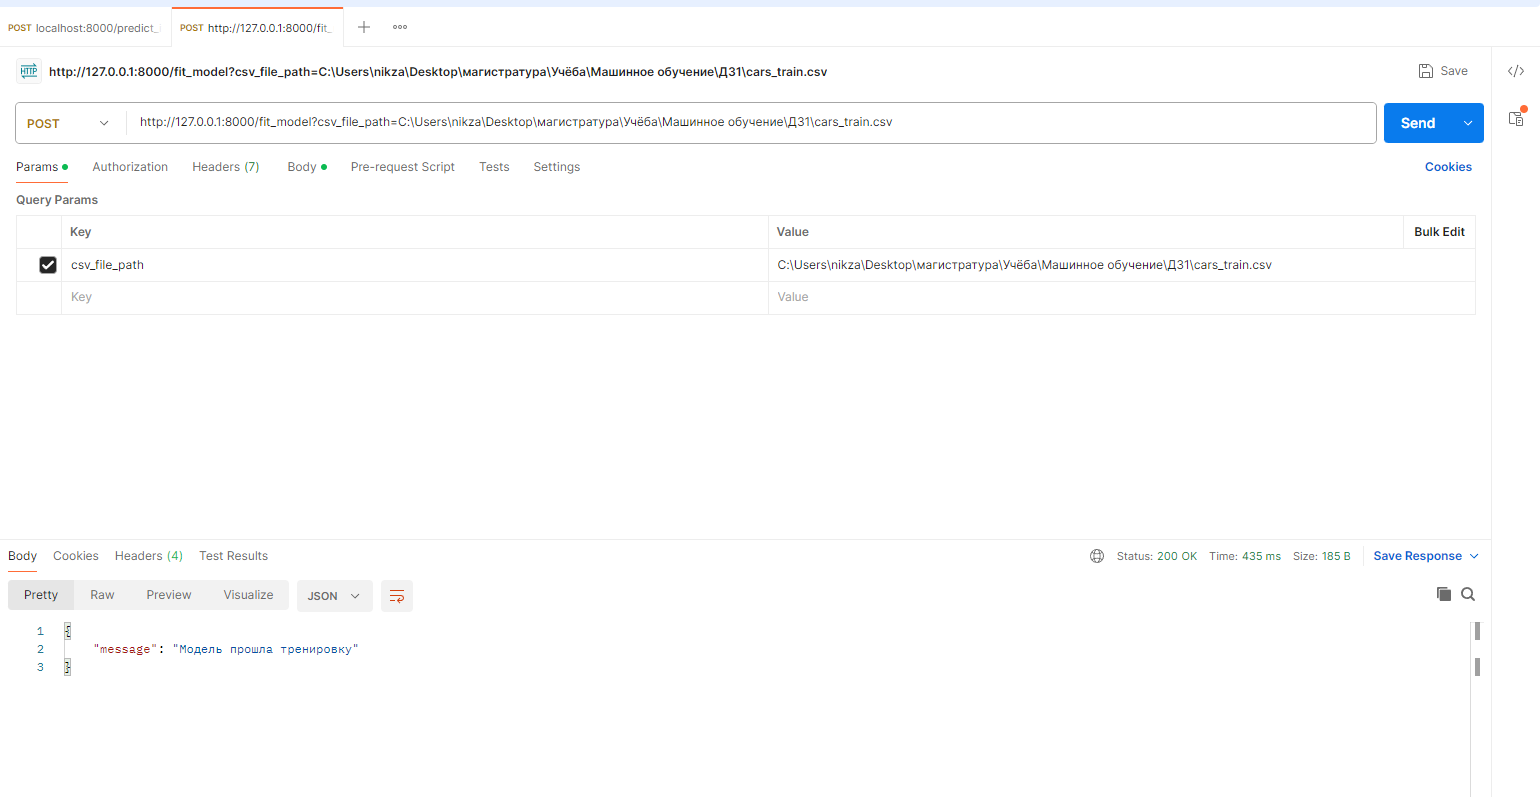

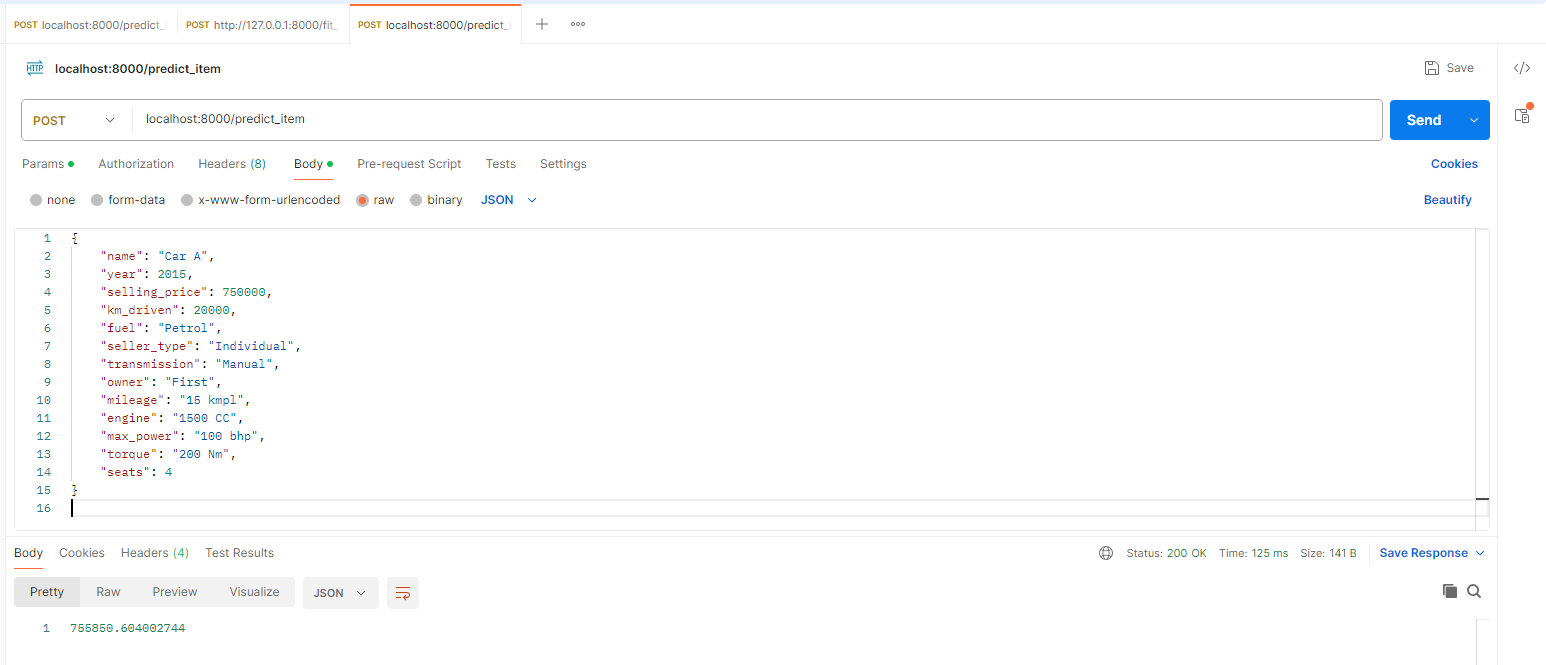

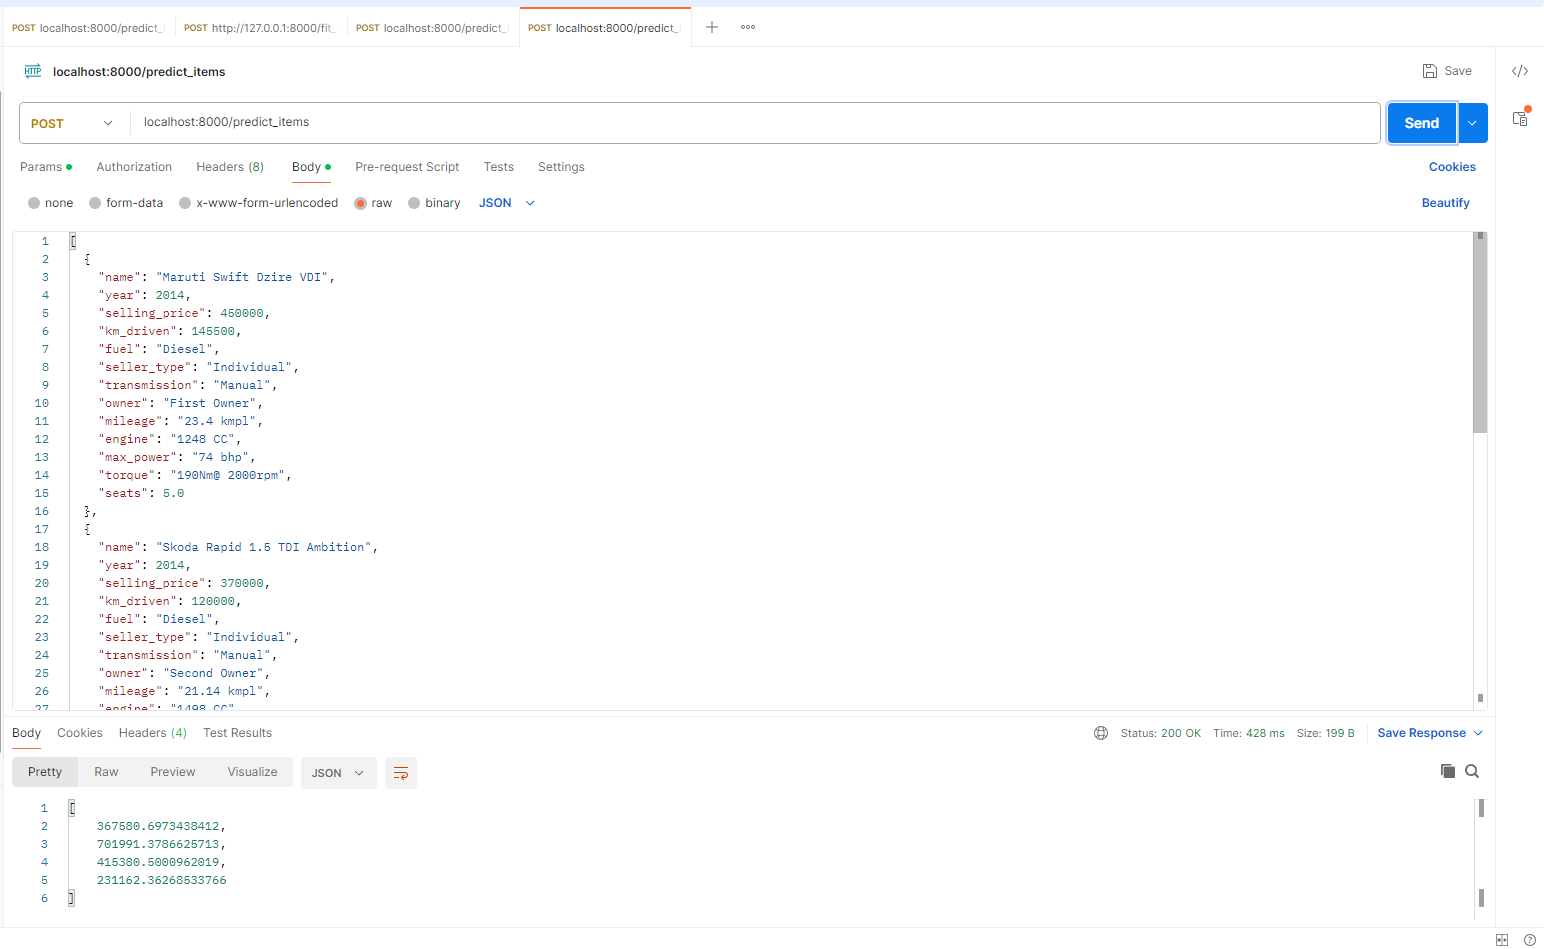

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

